# Fig. 2: Dipole Field Visualisation With Particle and Nanodisc

This notebook reproduces Fig. 2 in the paper, which shows a vector field plot of the dipole field generated by a uniformly magnetised nanoparticle together with a mockup of the nanodisc.

In [2]:
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse, FancyArrow, Rectangle
from matplotlib.pyplot import cm

%matplotlib inline

We start by defining a series helper functions which we will use in creating the plot below.

In [3]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    """
    Return new colormap obtained from `cmap` by extracting
    the slice betwen `minval` and `maxval (using `n` values).
    """
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [4]:
def draw_normalised_dipole_field(ax, dipole_x, dipole_y, xmin, xmax, nx, ymin, ymax, ny):
    """
    Draw arrows representing the dipole field created
    by a dipole located at (dipole_x, dipole_y).
    
    The arrows are placed on a grid with the bounds
    (xmin, xmax, ymin, ymax) and with nx and ny
    subdivisions along the x- and y-axis, respectively.
    """
    Y, X = np.mgrid[ymin:ymax:ny*1j, xmin:xmax:nx*1j]

    MX = np.zeros_like(X)
    MY = np.ones_like(Y)

    RX = X - dipole_x
    RY = Y - dipole_y
    r = np.sqrt((X - dipole_x)**2 + (Y - dipole_y)**2)

    mdotr = MX * RX + MY * RY
    
    U = 3*mdotr*RX/r**5 - MX/r**3
    V = 3*mdotr*RY/r**5 - MY/r**3
    speed = np.sqrt(U**2 + V**2)
    UN = U/speed
    VN = V/speed
    
    cmap = truncate_colormap(cm.inferno_r, 0.15, 1.0)
    ax.quiver(X, Y, UN, VN,        # data
              r,                   # colour the arrows based on this array
              scale=40, width=0.0030,
              pivot='middle', cmap=cmap)

In [5]:
def draw_vertical_line(ax, x, ymin, ymax, annotation, color):
    """
    Add vertical line to a matplotlib axes, including an annotation.

    Arguments:

    ax:          matplotlib Axes instance to which the line is to be added.
    x:           x-position of the line
    ymin, ymax:  vertical extent of the line
    annotation:  Text to be added at the bottom of the line.
    color:       Color of the line and annotation.

    """
    linewidth=2.0
    linestyle='-'

    ax.plot((x, x), (ymin - 3, ymax + 3), linewidth=linewidth, linestyle=linestyle, color=color)
    ax.annotate(annotation, xy=(x, ymin), xytext=(0, -20),
                ha='center', va='top', color=color,
                rotation=0,  fontsize=20,
                xycoords='data', textcoords='offset points')

In [6]:
def draw_particle(ax, x=0, y=10, diameter=20, color='#aaeeff', arrow_color='blue'):
    """
    Draw a circle representing the nanoparticle as well as
    an arrow indicating its magnetization.
    """
    arrow_length = 0.6 * diameter
    arrow_bottom = y - 0.5*arrow_length
    
    particle = Ellipse((x, y), diameter, diameter, facecolor=color)
    m_particle = FancyArrow(x, arrow_bottom, 0, arrow_length,
                            color=arrow_color, linewidth=5,
                            length_includes_head=True, head_width=3, head_length=4)
    ax.add_patch(particle)
    ax.add_patch(m_particle)

In [7]:
def draw_nanodisc(ax, x=0, y=-70, width=150, height=10, thickness=2, color='white'):
    """
    Draw the nanodisc as two ellipses with given
    width and height, centered at (x, y).
    """
    y_top = y
    y_bottom = y - thickness

    ellipse_top    = Ellipse((x, y_top),    width, height, angle=0.0, facecolor=color)
    ellipse_bottom = Ellipse((x, y_bottom), width, height, angle=0.0, facecolor=color)
    rect = Rectangle((-0.5*width, y_bottom), width, thickness, facecolor=color, edgecolor='none')

    # Draw the bottom ellipse first, then the rectangle
    # to cover the upper half of it and then draw the top
    # ellipse. Note that this is not strictly necessary
    # for a white ellipse but it 
    ax.add_patch(ellipse_bottom)
    ax.add_patch(rect)
    ax.add_patch(ellipse_top)

    # Draw the sides connecting the top and bottom ellipse.
    # For some reason it looks better if we shift them to
    # the left by a tiny amount.
    xshift = -0.1
    xleft  = -0.5 * width + xshift
    xright = +0.5 * width + xshift
    ax.plot([xleft, xleft], [y_bottom, y_top], color='black', linewidth=1)
    ax.plot([xright, xright], [y_bottom, y_top], color='black', linewidth=1)

Finally we can plot the actual figure.

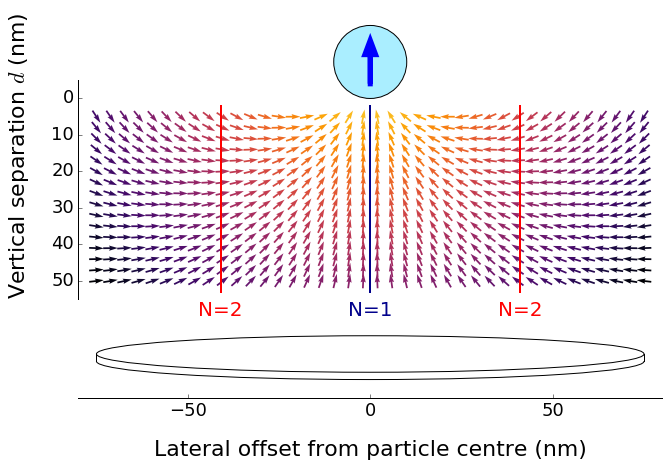

In [11]:
dipole_x, dipole_y = 0, 10

xmin, xmax = -80, 80
ymin, ymax = -82, 25

xmin_fld, xmax_fld = -75, 75
ymin_fld, ymax_fld = -50, -5
nx_fld, ny_fld = 40, 16

plt.style.use('style_sheets/fig2.mplstyle')

fig, ax = plt.subplots(figsize=(12, 7))

# Tweak appearance of the axis spines etc.
ax.set_aspect('equal')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
xticks = [-50, 0, 50]
yticks = [0, -10, -20, -30, -40, -50]
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_yticklabels([str(-y) for y in yticks])
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_bounds(-55, 5)
ax.set_xlabel('Lateral offset from particle centre (nm)', labelpad=20)
ax.set_ylabel(r'Vertical separation $d$ (nm)', labelpad=20, y=0.62)

# Plot particle, nanodisc, dipole field and vertical lines
draw_particle(ax, x=dipole_x, y=dipole_y, color='#aaeeff')
draw_nanodisc(ax, color='white')
draw_normalised_dipole_field(ax, dipole_x, dipole_y,
                             xmin_fld, xmax_fld, nx_fld,
                             ymin_fld, ymax_fld, ny_fld)
draw_vertical_line(ax, x=  0, ymin=ymin_fld, ymax=ymax_fld, annotation='N=1', color='darkblue')
draw_vertical_line(ax, x=-41, ymin=ymin_fld, ymax=ymax_fld, annotation='N=2', color='red')
draw_vertical_line(ax, x=+41, ymin=ymin_fld, ymax=ymax_fld, annotation='N=2', color='red')